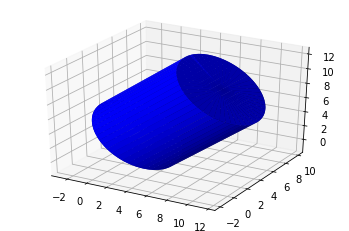

In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  2 18:33:10 2016

Modified from https://stackoverflow.com/questions/38076682/how-to-add-colors-to-each-individual-face-of-a-cylinder-using-matplotlib
to add "end caps" and to undo fancy coloring.

@author: astrokeat
"""

import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import norm

#axis and radius
p0 = np.array([1, 3, 2]) #point at one end
p1 = np.array([8, 5, 9]) #point at other end
R = 5

#vector in direction of axis
v = p1 - p0

#find magnitude of vector
mag = norm(v)

#unit vector in direction of axis
v = v / mag

#make some vector not in the same direction as v
not_v = np.array([1, 0, 0])
if (v == not_v).all():
    not_v = np.array([0, 1, 0])

#make vector perpendicular to v
n1 = np.cross(v, not_v)
#normalize n1
n1 /= norm(n1)

#make unit vector perpendicular to v and n1
n2 = np.cross(v, n1)

#surface ranges over t from 0 to length of axis and 0 to 2*pi
t = np.linspace(0, mag, 2)
theta = np.linspace(0, 2 * np.pi, 100)
rsample = np.linspace(0, R, 2)

#use meshgrid to make 2d arrays
t, theta2 = np.meshgrid(t, theta)

rsample,theta = np.meshgrid(rsample, theta)

#generate coordinates for surface
# "Tube"
X, Y, Z = [p0[i] + v[i] * t + R * np.sin(theta2) * n1[i] + R * np.cos(theta2) *       n2[i] for i in [0, 1, 2]]
# "Bottom"
X2, Y2, Z2 = [p0[i] + rsample[i] * np.sin(theta) * n1[i] + rsample[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]
# "Top"
X3, Y3, Z3 = [p0[i] + v[i]*mag + rsample[i] * np.sin(theta) * n1[i] + rsample[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]


ax=plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='blue')
ax.plot_surface(X2, Y2, Z2, color='blue')
ax.plot_surface(X3, Y3, Z3, color='blue')

plt.show()

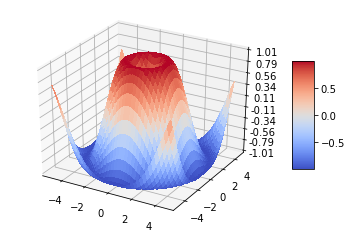

In [2]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

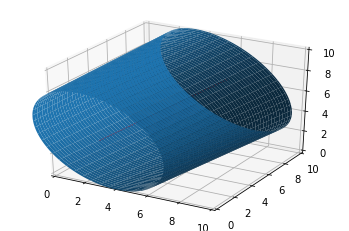

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import norm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = np.array([0, 0, 0])
#axis and radius
p0 = np.array([1, 3, 2])
p1 = np.array([8, 5, 9])
R = 5
#vector in direction of axis
v = p1 - p0
#find magnitude of vector
mag = norm(v)
#unit vector in direction of axis
v = v / mag
#make some vector not in the same direction as v
not_v = np.array([1, 0, 0])
if (v == not_v).all():
    not_v = np.array([0, 1, 0])
#make vector perpendicular to v
n1 = np.cross(v, not_v)
#normalize n1
n1 /= norm(n1)
#make unit vector perpendicular to v and n1
n2 = np.cross(v, n1)
#surface ranges over t from 0 to length of axis and 0 to 2*pi
t = np.linspace(0, mag, 100)
theta = np.linspace(0, 2 * np.pi, 100)
#use meshgrid to make 2d arrays
t, theta = np.meshgrid(t, theta)
#generate coordinates for surface
X, Y, Z = [p0[i] + v[i] * t + R * np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
ax.plot_surface(X, Y, Z)
#plot axis
ax.plot(*zip(p0, p1), color = 'red')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
plt.show()